# 1. Importing libraries

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# 2. Importing data

In [52]:
path = r'C:\Users\thoma\OneDrive\Dokumente\data analytics\ML_Ach1\ClimateWins'

In [53]:
path

'C:\\Users\\thoma\\OneDrive\\Dokumente\\data analytics\\ML_Ach1\\ClimateWins'

In [54]:
Weather_stations = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'Scaled_weather_stations.pkl'))
Pleasant_weather = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'Pleasant_weather.pkl'))

# 3. Artificial Neural Network

In [55]:
# Creating 'X' & 'y'
X = Weather_stations
y = Pleasant_weather

In [56]:
print(X.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [57]:
# Splitting the data into training and testing sets & setting a seed
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [58]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [59]:
X_train[:10]

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
8196,-1.417570,-0.027930,-0.619294,-0.750867,1.186458,-0.325270,-0.179228,0.535359,1.359088,1.116341,...,0.169692,0.058712,-0.563290,-0.005290,-0.159420,-0.024706,-0.408784,1.464779,1.584476,1.174547
20472,1.076130,-0.573924,0.555086,-0.215925,-0.821838,-0.265148,-0.179228,-1.065304,-1.655817,-1.458775,...,-0.443701,-0.081896,-0.003958,-1.065618,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
18269,0.660514,-0.846921,0.735760,-1.270525,-1.004410,-0.305229,0.817688,-0.926116,-1.655817,-1.887961,...,-0.443701,1.042971,0.406218,-0.829990,-0.455304,-0.024706,-0.078390,-2.921377,-3.225169,-2.190135
7713,-1.417570,-0.027930,-0.167609,0.410721,-0.585568,-0.445514,-0.179228,-0.253374,-1.601495,-1.550743,...,1.396477,1.183580,-1.029400,-1.112744,1.379179,-0.024706,-1.039536,-1.178932,-0.656381,-1.126091
21958,0.660514,3.111534,-0.619294,-0.689731,-0.821838,1.919289,-0.179228,-0.949314,-0.582946,-0.692371,...,-0.443701,-0.081896,-0.003958,-0.005290,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530
11464,0.660514,-0.983419,-1.070979,1.847422,1.583822,-0.445514,-0.179228,1.277695,1.073894,0.656499,...,-1.057093,0.902363,2.196080,2.315650,-0.490810,-0.024706,2.714940,0.713725,0.300082,0.973241
3984,-1.001953,-0.027930,0.374412,-0.001949,-0.811098,-0.445514,-0.179228,-0.230176,-0.908881,-1.044917,...,0.169692,1.042971,-1.197200,-0.829990,-0.455304,-0.024706,-0.078390,0.052797,0.382065,-0.292110
4752,1.076130,-0.027930,1.639129,-0.001949,-1.251420,-0.445514,-0.179228,-1.065304,-1.941011,-2.102554,...,1.396477,1.886622,1.804548,-1.183432,-0.490810,-0.024706,-1.039536,-0.067372,0.491375,-0.608447
11092,0.660514,-0.027930,0.645423,0.150892,0.670960,0.556521,-0.179228,0.210586,0.720797,0.748467,...,0.783085,0.902363,-1.029400,0.866535,0.420514,-0.024706,-0.018319,0.563514,0.436720,0.656903
21377,-1.417570,-1.119918,-1.341989,-0.093653,-0.005632,-0.445514,-0.179228,2.066427,1.141798,0.549202,...,-0.443701,-0.081896,-0.003958,1.773704,-0.005560,-0.024706,-0.018319,-0.007287,-0.000520,-0.004530


In [60]:
# Importing the original unscaled data
df = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))

In [61]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [62]:
# Dropping unnecessary columns
df_unscaled = df.drop(columns=['DATE', 'MONTH'])

In [63]:
df_unscaled.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,6.1,3.3,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,8,2.1,0.90,1.018,0.18,0.30,0,0.0,8.5,5.1,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,3,2.1,0.92,1.018,0.58,0.00,0,4.1,6.3,3.8,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,6,2.1,0.95,1.018,0.65,0.14,0,5.4,3.0,-0.7,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [64]:
# Creating 'X_unsc'
X_unsc = df_unscaled
y = Pleasant_weather

In [65]:
print(X_unsc.shape)
print(y.shape)

(22950, 168)
(22950, 15)


In [66]:
# Splitting the data set & setting the seed
X_unsc_train, X_unsc_test, y_train, y_test = train_test_split(X_unsc, y, random_state=42)

In [67]:
print(X_unsc_train.shape)
print(X_unsc_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 168)
(5738, 168)
(17212, 15)
(5738, 15)


In [68]:
X_unsc_train[:10]

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
8196,2,2.1,0.69,1.0131,2.45,0.06,0,6.9,20.4,13.6,...,6,0.83,1.0082,1.13,0.28,0,2.1,15.6,13.7,17.6
20472,8,1.7,0.82,1.0166,0.58,0.09,0,0.0,-1.8,-3.2,...,5,0.82,1.0142,0.23,0.41,0,3.4,10.7,7.9,13.5
18269,7,1.5,0.84,1.0097,0.41,0.07,2,0.6,-1.8,-6.0,...,5,0.90,1.0186,0.43,0.03,0,3.2,1.0,-3.9,5.9
7713,2,2.1,0.74,1.0207,0.80,0.00,0,3.5,-1.4,-3.8,...,8,0.91,1.0032,0.19,1.58,0,0.0,6.8,5.5,9.6
21958,7,4.4,0.69,1.0135,0.58,1.18,0,0.5,6.1,1.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
11464,7,1.4,0.64,1.0301,2.82,0.00,0,10.1,18.3,10.6,...,4,0.89,1.0378,3.10,0.00,0,12.5,13.1,9.0,16.9
3984,3,2.1,0.80,1.0180,0.59,0.00,0,3.6,3.7,-0.5,...,6,0.90,1.0014,0.43,0.03,0,3.2,10.9,9.3,12.5
4752,8,2.1,0.94,1.0180,0.18,0.00,0,0.0,-3.9,-7.4,...,8,0.96,1.0336,0.13,0.00,0,0.0,10.5,9.7,11.4
11092,7,2.1,0.83,1.0190,1.97,0.50,0,5.5,15.7,11.2,...,7,0.89,1.0032,1.87,0.77,0,3.4,12.6,9.5,15.8
21377,2,1.3,0.61,1.0174,1.34,0.00,0,13.5,18.8,9.9,...,5,0.82,1.0142,2.64,0.41,0,3.4,10.7,7.9,13.5


In [69]:
# Assigning the unscaled data to DataFrames
X_train_df = pd.DataFrame(X_unsc_train, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_unsc_test, index=X_test.index, columns=X_test.columns)

In [70]:
# Assigning the scaled data to DataFrames
X_train_df2 = pd.DataFrame(X_train, index=X_train.index, columns=X_train.columns)
X_test_df2 = pd.DataFrame(X_test, index=X_test.index, columns=X_test.columns)

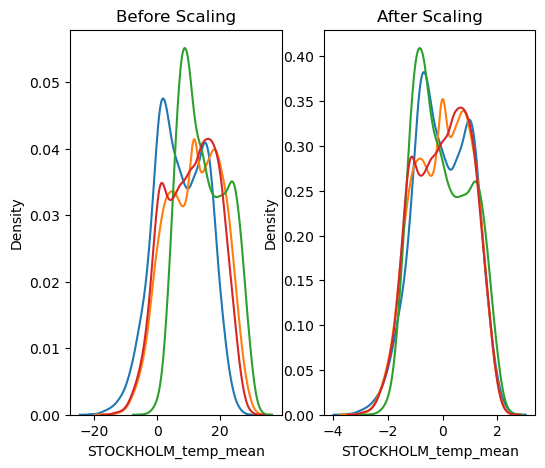

In [71]:
# Showing scaling differences
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train_df['STOCKHOLM_temp_mean'], ax=ax1)
sns.kdeplot(X_train_df['BUDAPEST_temp_mean'], ax=ax1)
sns.kdeplot(X_train_df['MADRID_temp_mean'], ax=ax1)
sns.kdeplot(X_train_df['LJUBLJANA_temp_mean'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_df2['STOCKHOLM_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df2['BUDAPEST_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df2['MADRID_temp_mean'], ax=ax2)
sns.kdeplot(X_train_df2['LJUBLJANA_temp_mean'], ax=ax2)

plt.show()

# The curves of the scaled data for the different weather stations appear better aligned.

In [72]:
# Creating the ANN
# So (10, 5) is two hidden layers with 10 and 5 nodes respectively.
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, tol=0.0001)

# Fitting the data to the model
mlp.fit(X_train, y_train)

C:\Users\thoma\Documents\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500)

In [73]:
# Accuracy score
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.5333488264001859
0.5325897525270129


C:\Users\thoma\Documents\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


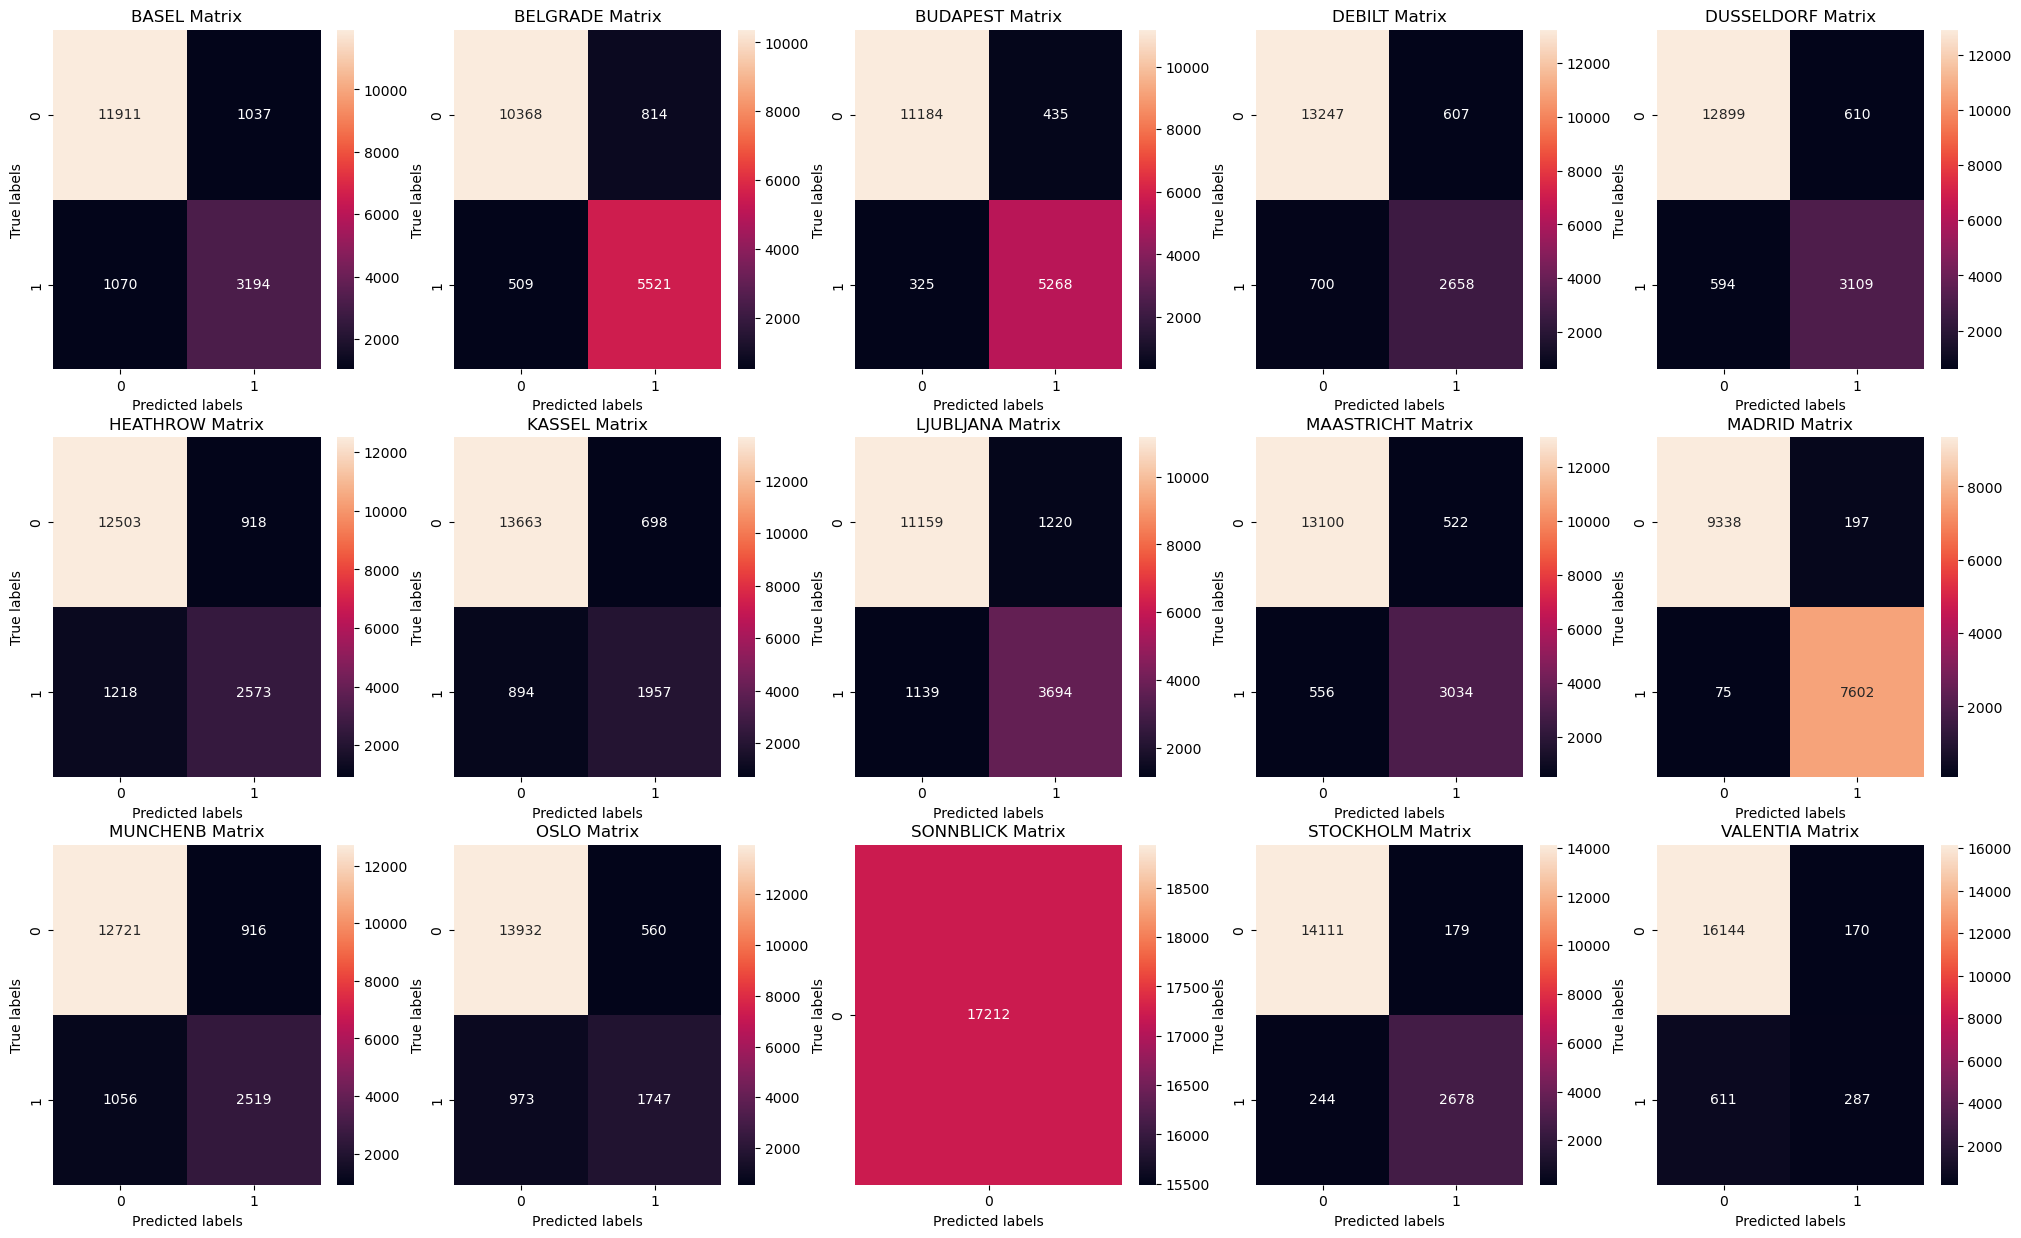

In [74]:
# Multi-station confusion matrix on training data - displaying multiple confusion matrices at once
locations = list({x.split("_")[0] for x in X.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix');
        count+=1

C:\Users\thoma\Documents\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


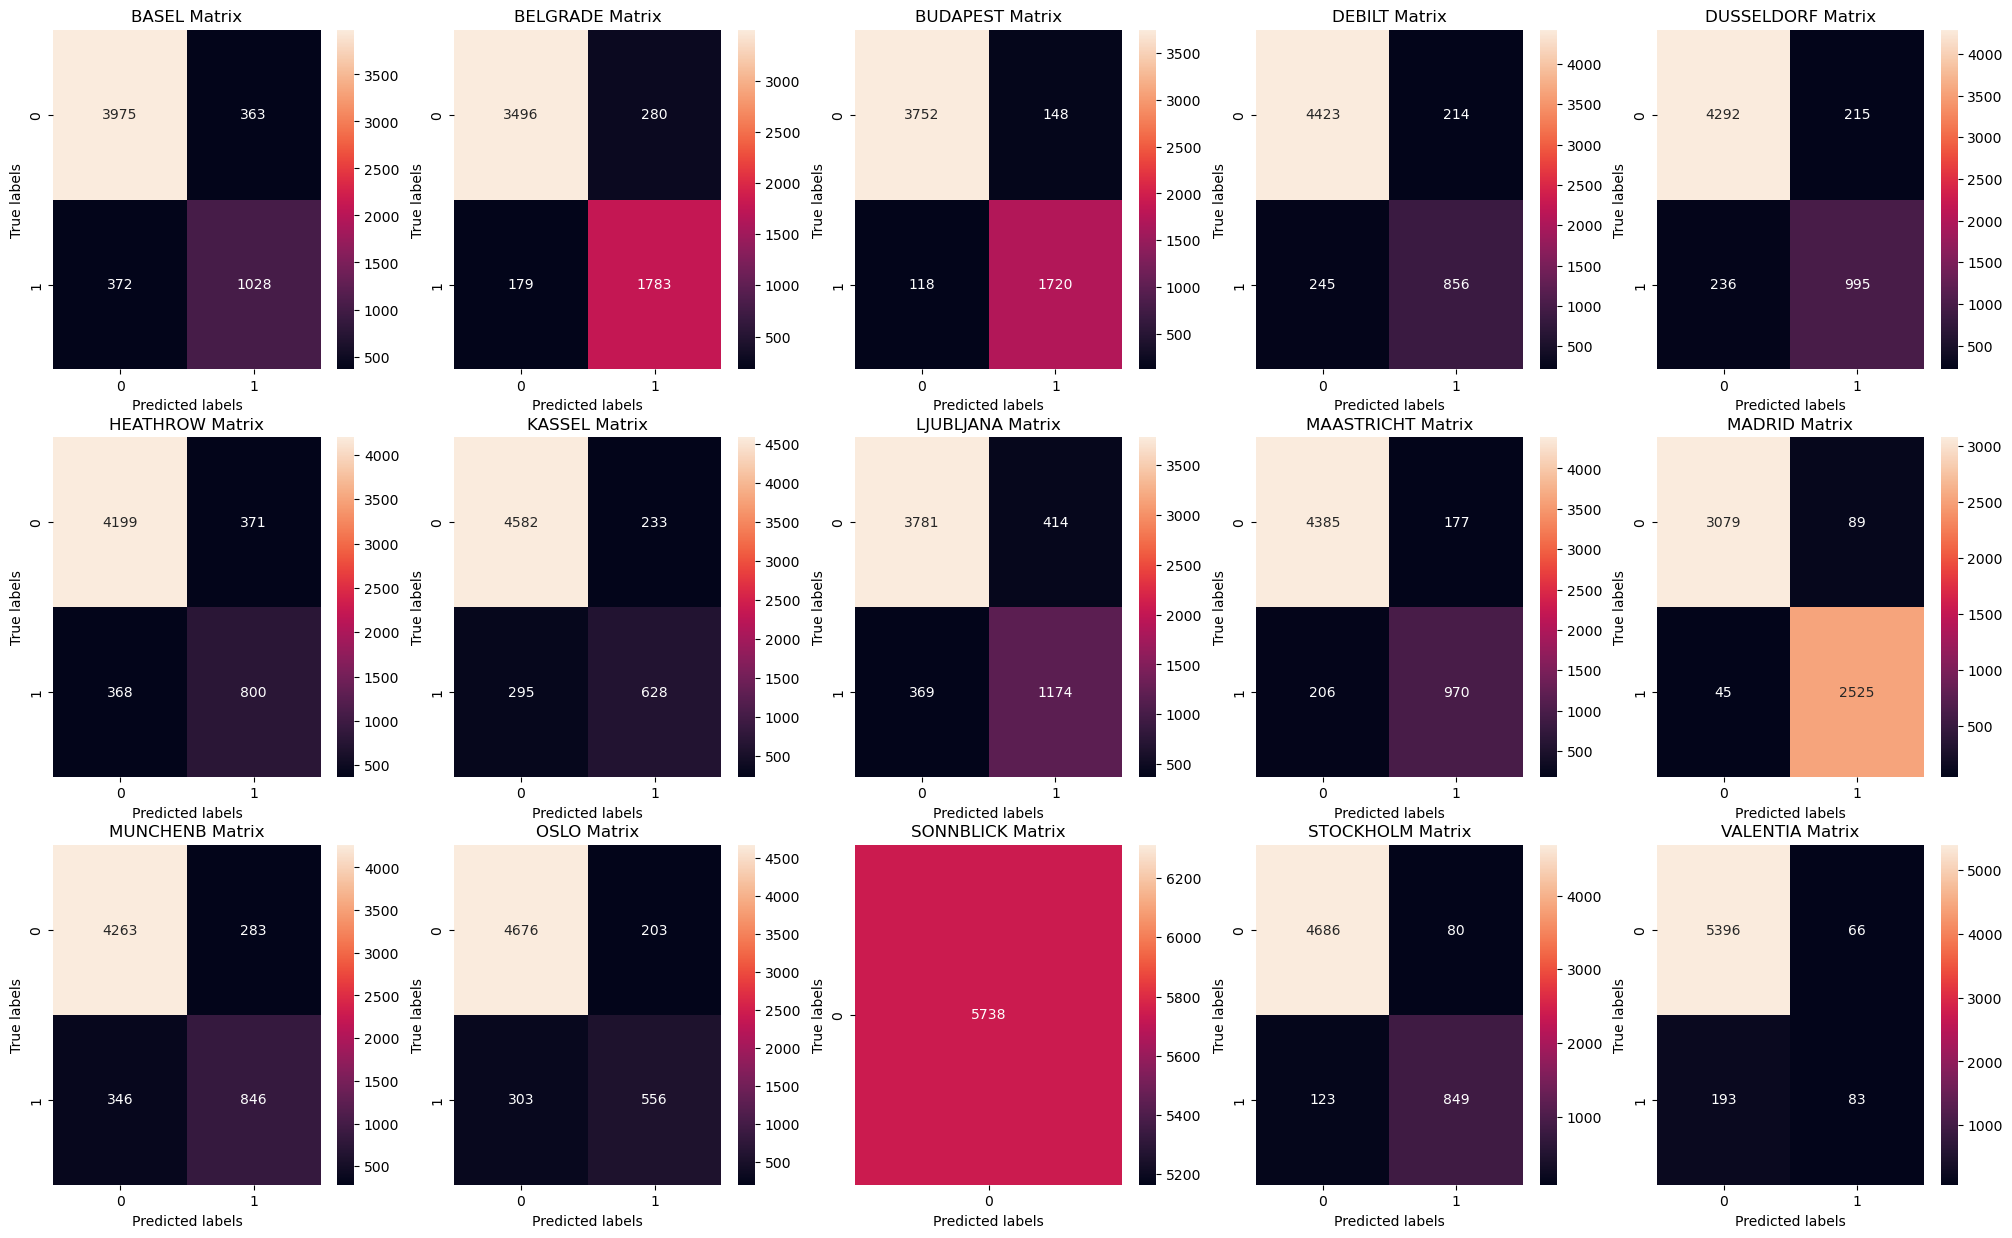

In [75]:
# Multi-station confusion matrix on testing data
locations = list({x.split("_")[0] for x in X.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix');
        count+=1

# Accuracy scores and multi-station confusion matrices seem quite inaccurate, so let's adjust the parameters.

In [76]:
# Adjusting model parameters
# So (10, 5, 5) is three hidden layers with 10, 5 and 5 nodes respectively.
mlp = MLPClassifier(hidden_layer_sizes=(10, 5, 5), max_iter=500, tol=0.0001)

# Fitting the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5, 5), max_iter=500)

In [77]:
# Accuracy score
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.5359051824308622
0.5357267340536772


C:\Users\thoma\Documents\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


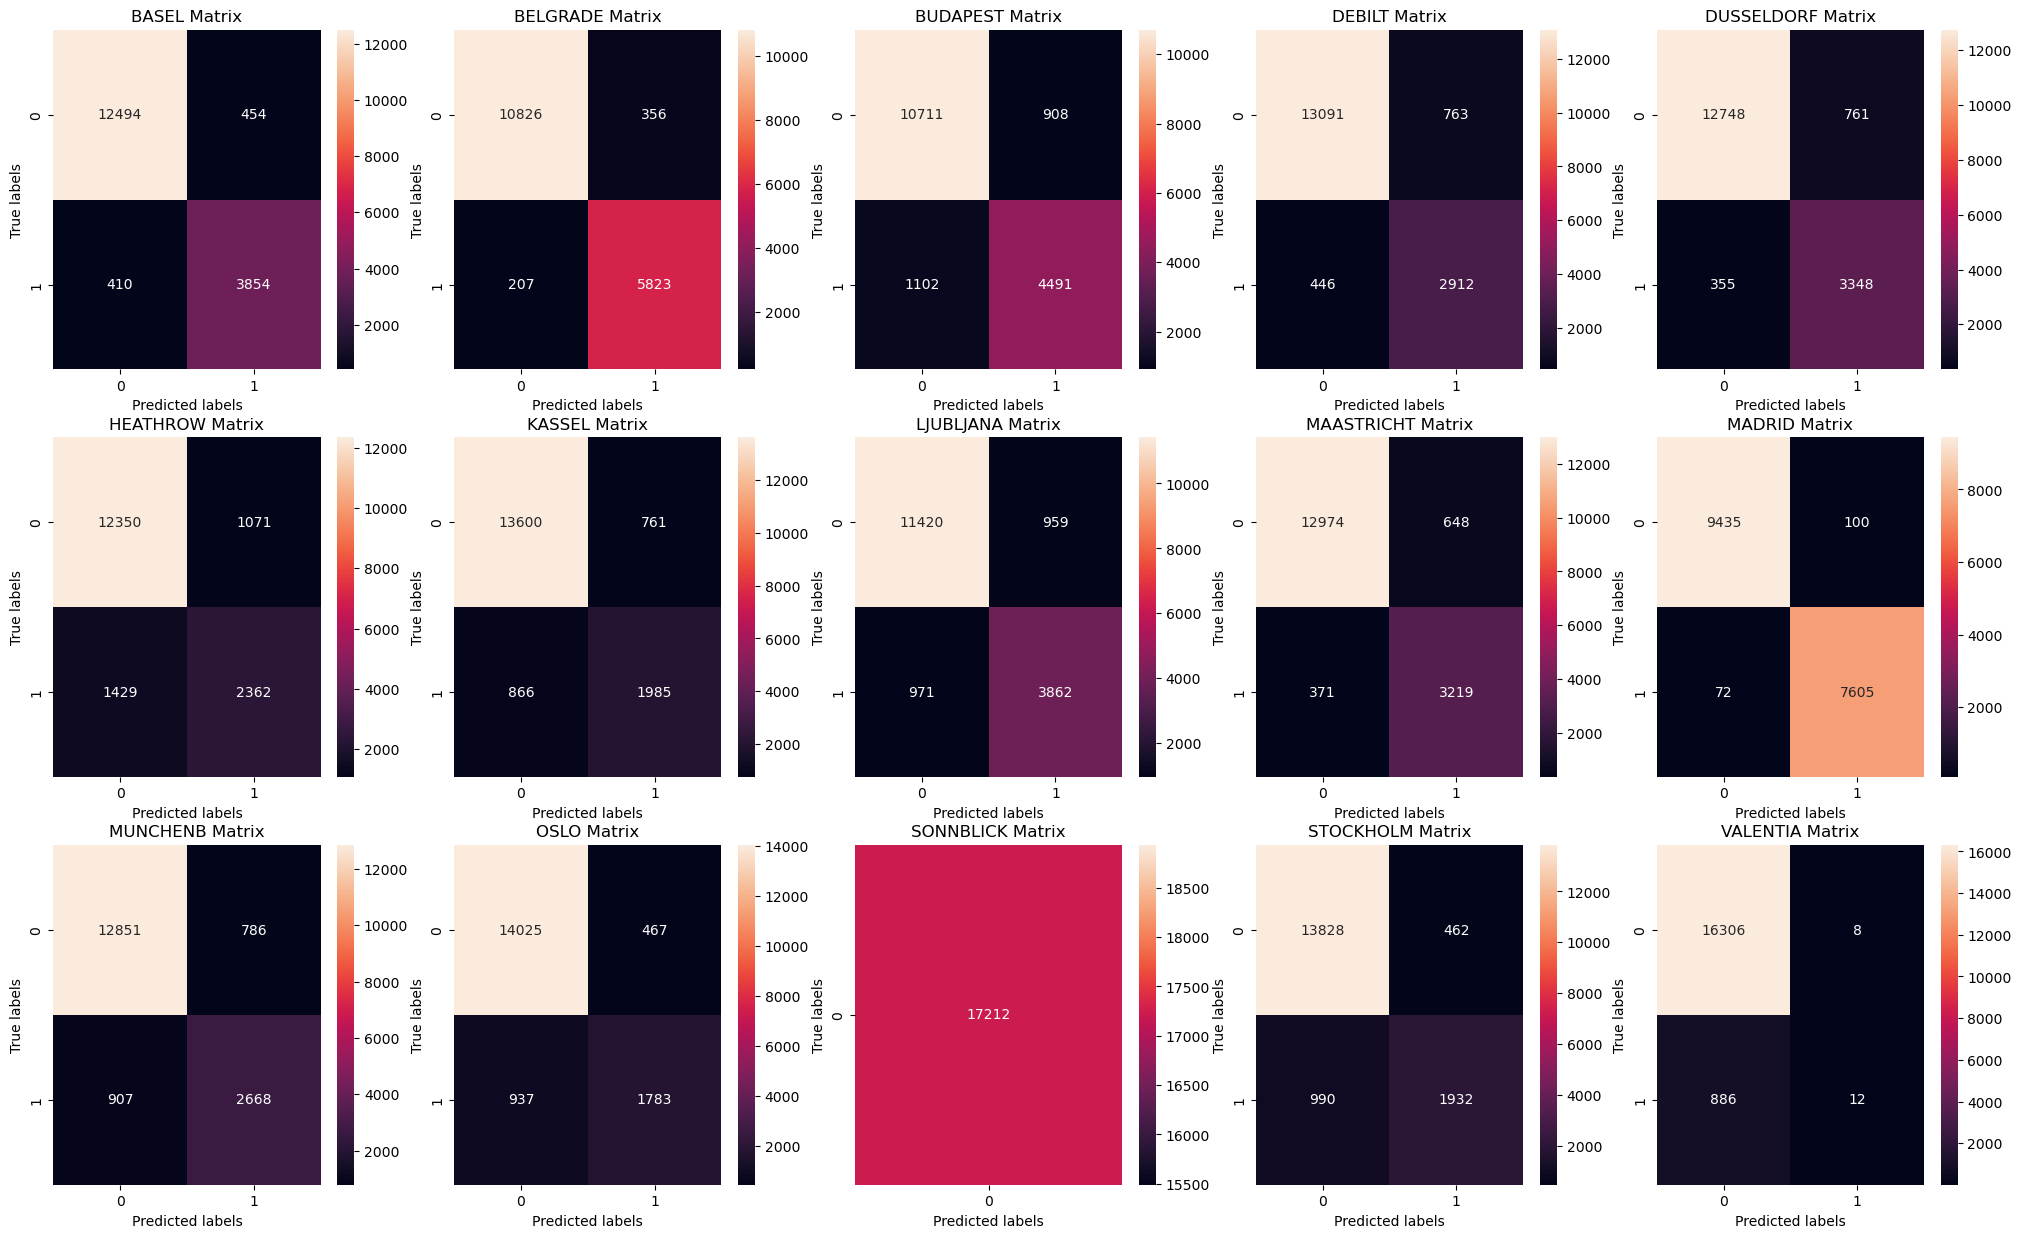

In [78]:
# Multi-station confusion matrix on the training data
locations = list({x.split("_")[0] for x in X.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix');
        count+=1

C:\Users\thoma\Documents\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


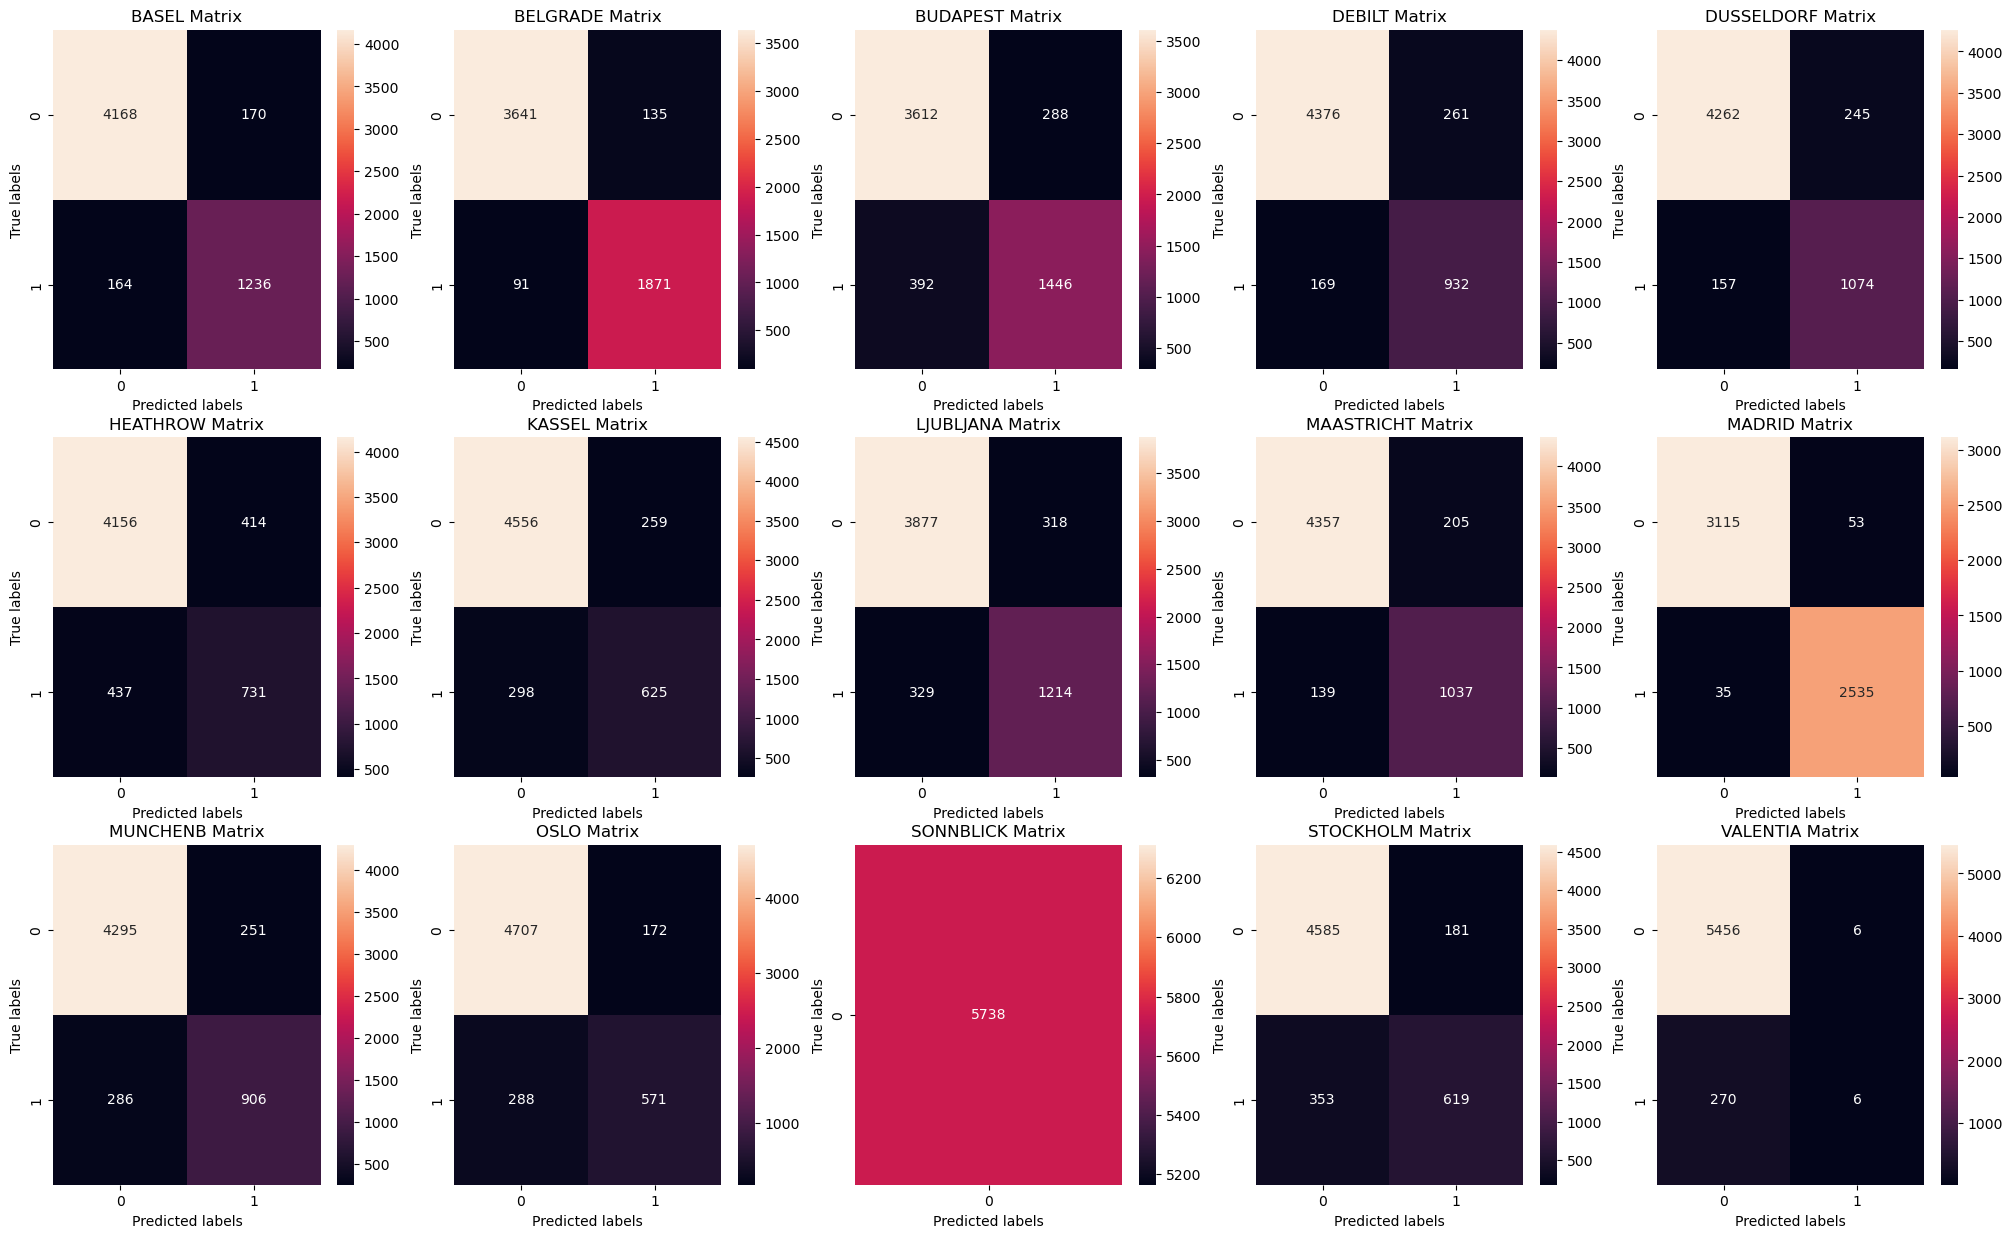

In [79]:
# Multi-station confusion matrix on the testing data
locations = list({x.split("_")[0] for x in X.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix');
        count+=1

# Not even better, so let's keep adjusting the model parameters.

In [80]:
# Adjusting model parameters
# So (10, 5, 5) is three hidden layers with 10, 5 and 5 nodes respectively.
mlp = MLPClassifier(hidden_layer_sizes=(10, 5, 5), max_iter=1000, tol=0.0001)

# Fitting the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 5, 5), max_iter=1000)

In [81]:
# Accuracy score
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.5263188473158261
0.5320669222725688


C:\Users\thoma\Documents\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


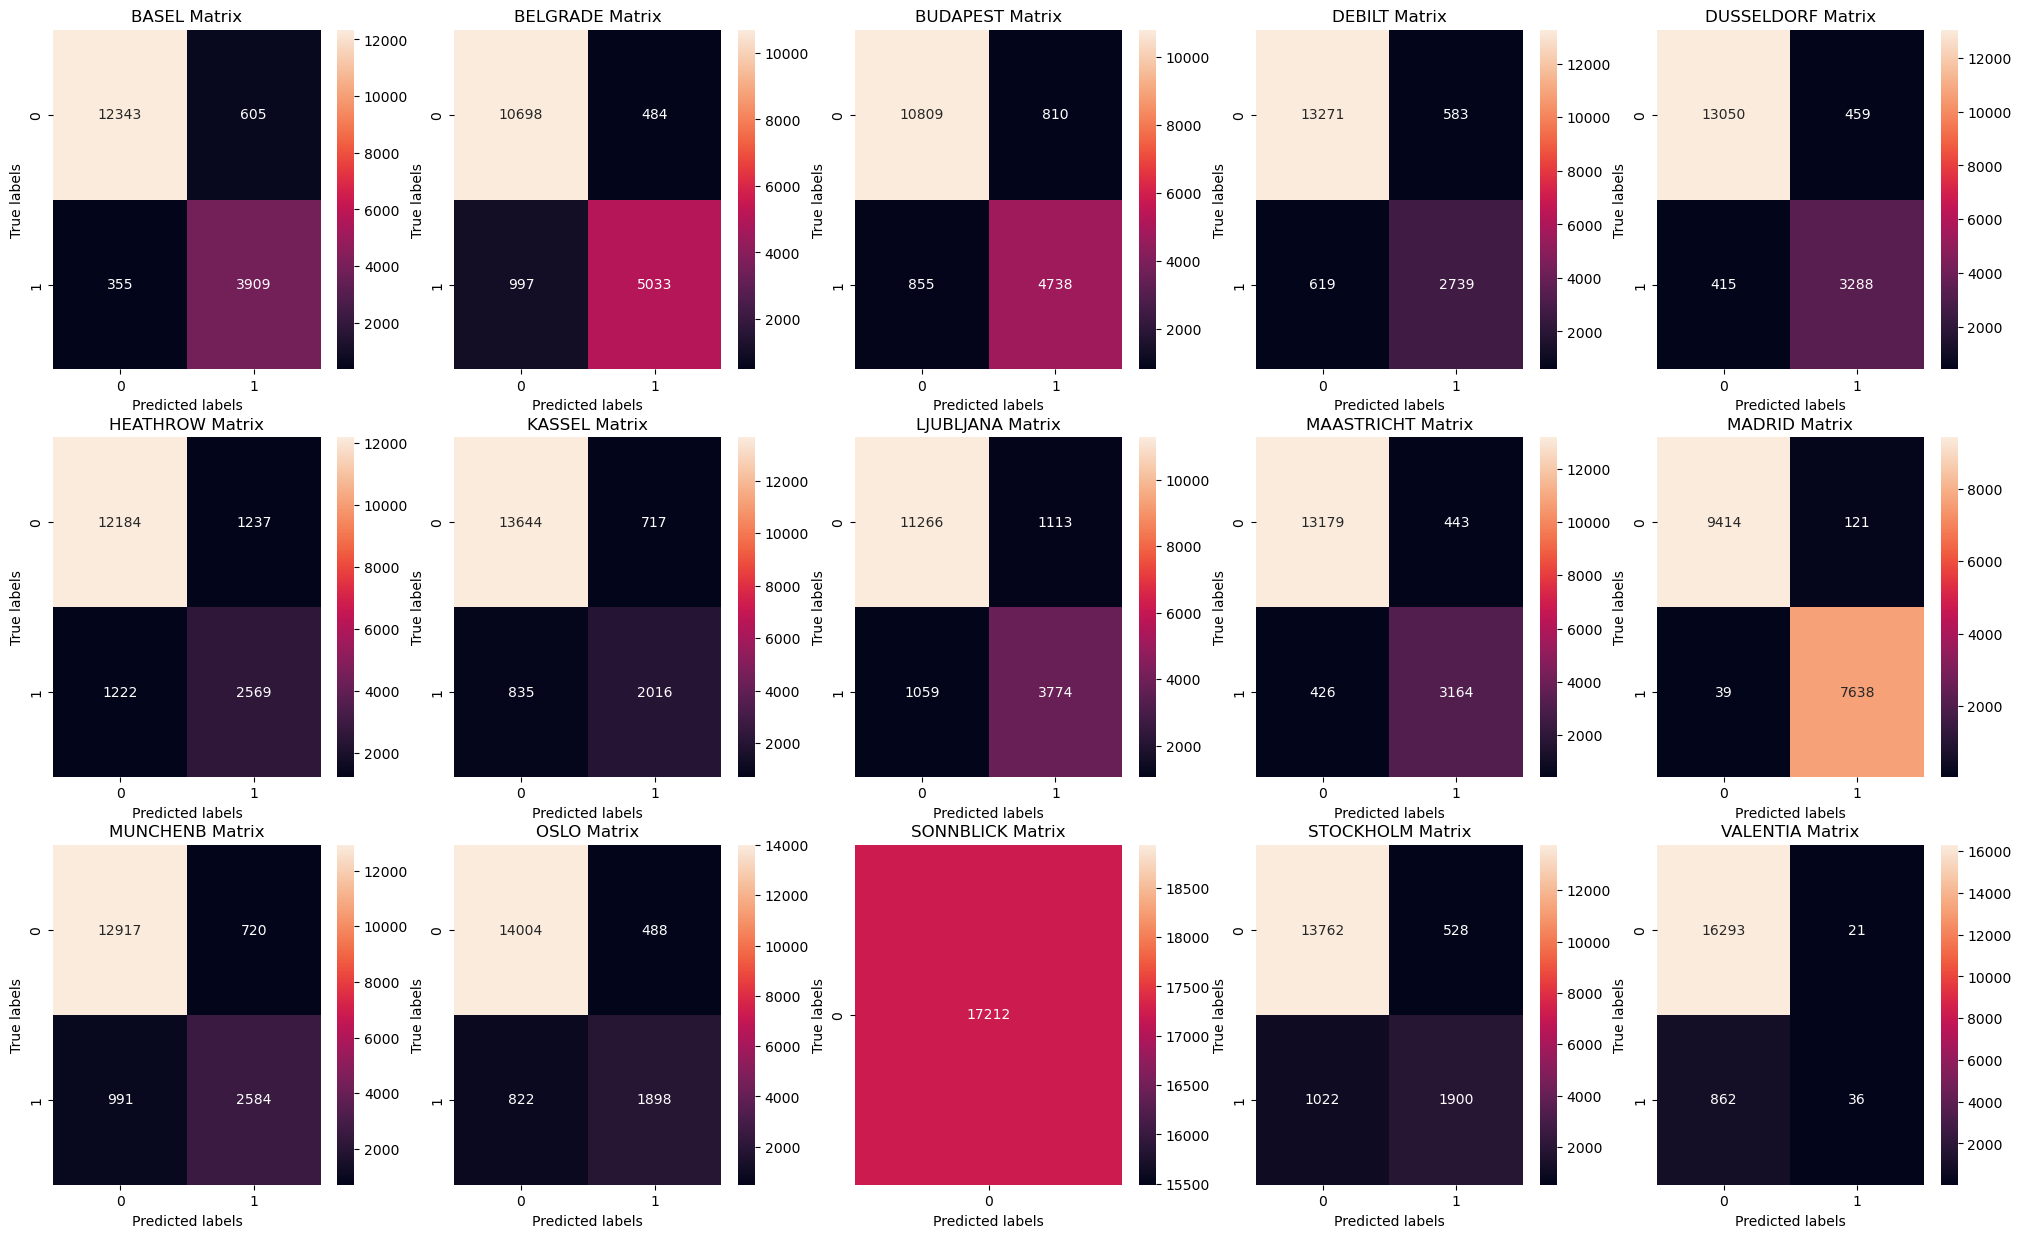

In [82]:
# Multi-station confusion matrix on the training data
locations = list({x.split("_")[0] for x in X.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix');
        count+=1

C:\Users\thoma\Documents\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


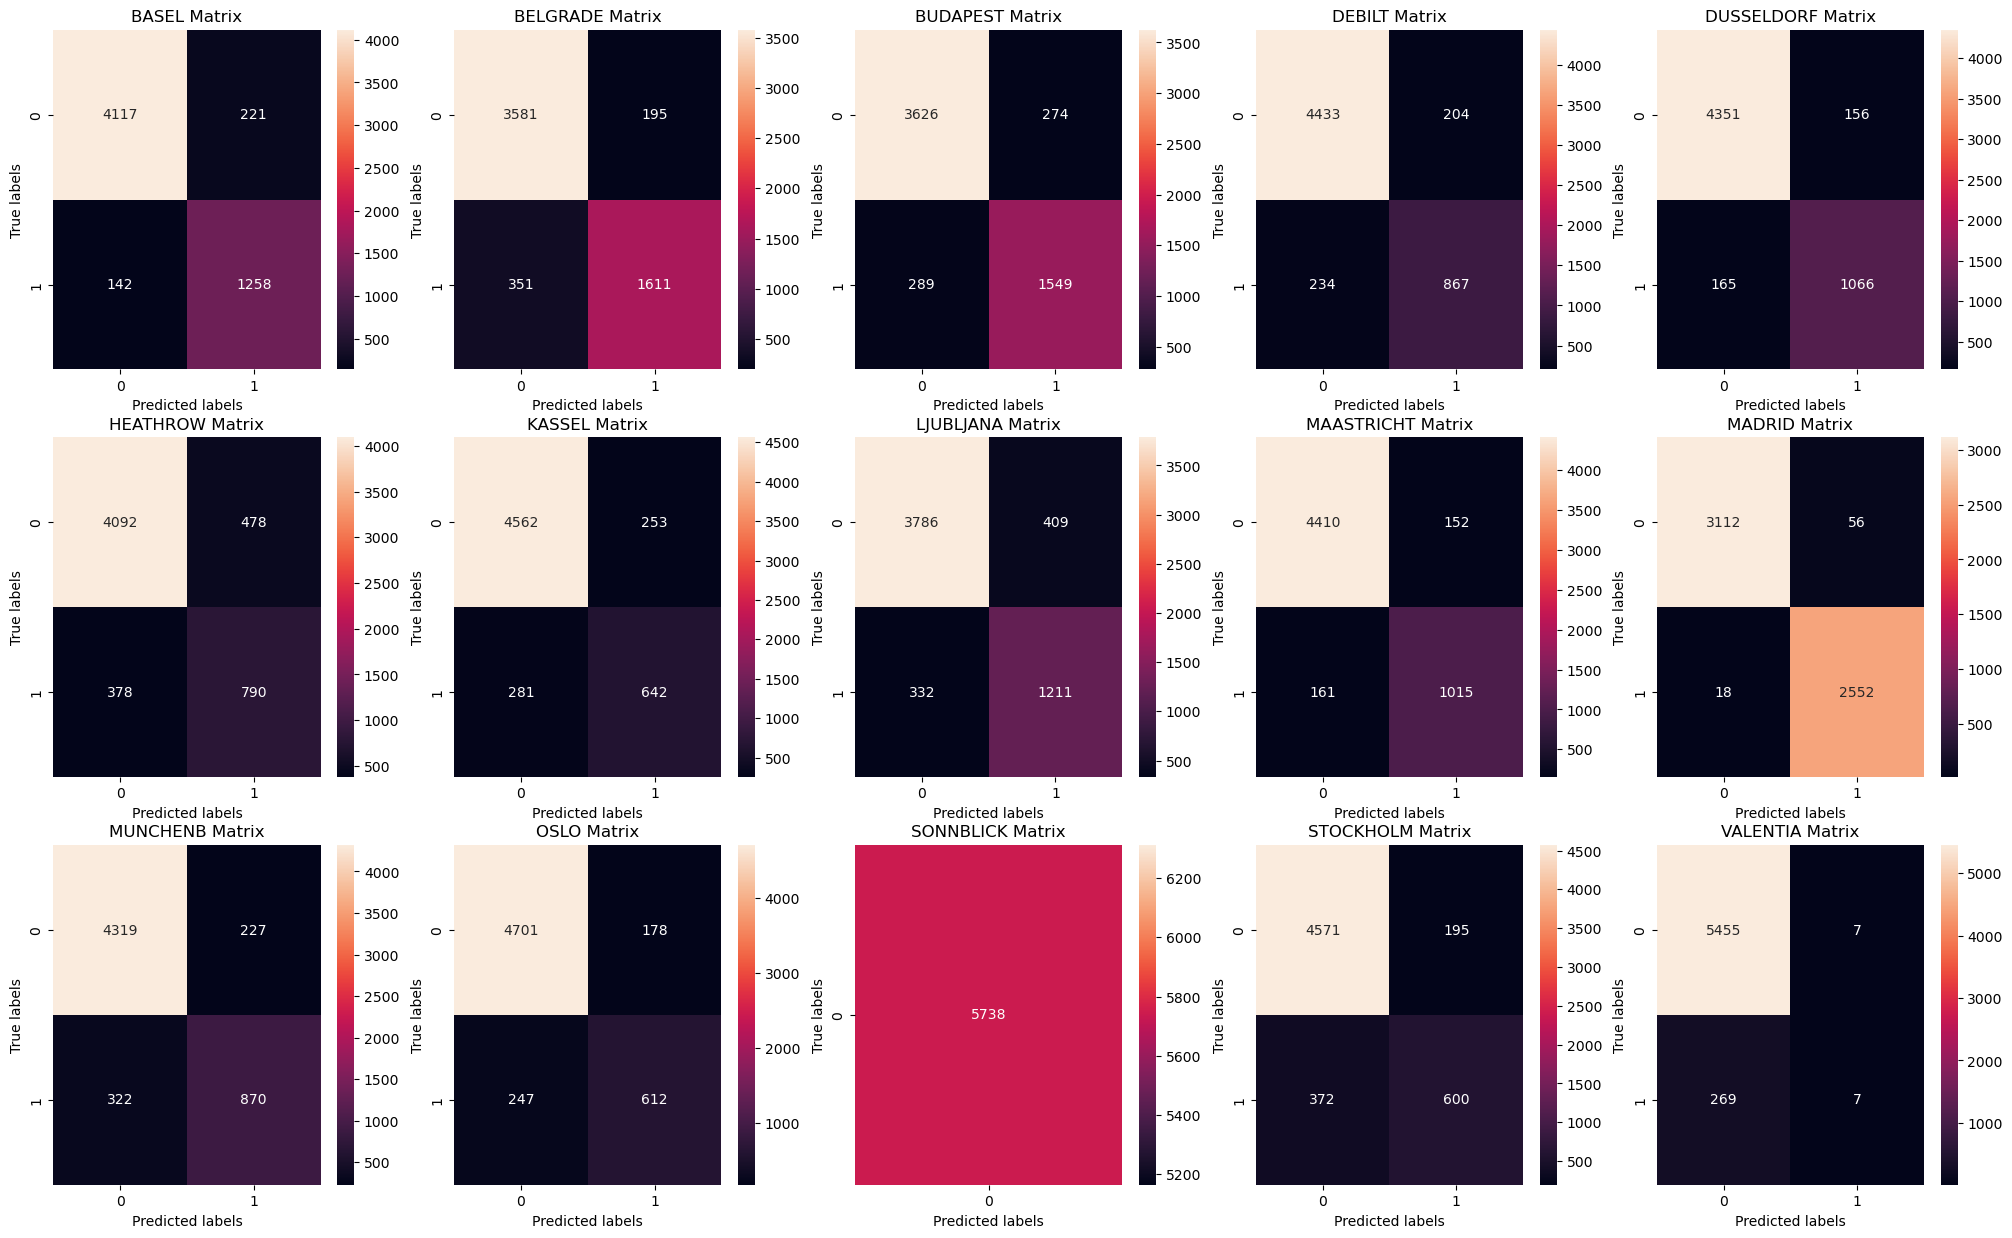

In [83]:
# Multi-station confusion matrix on the testing data
locations = list({x.split("_")[0] for x in X.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix');
        count+=1

In [84]:
# Further adjusting model parameters
# So (20, 10, 10) is three hidden layers with 20, 10 and 10 nodes respectively.
mlp = MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000, tol=0.0001)

# Fitting the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 10, 10), max_iter=1000)

In [85]:
# Accuracy score
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.680455496165466
0.6504008365284071


C:\Users\thoma\Documents\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


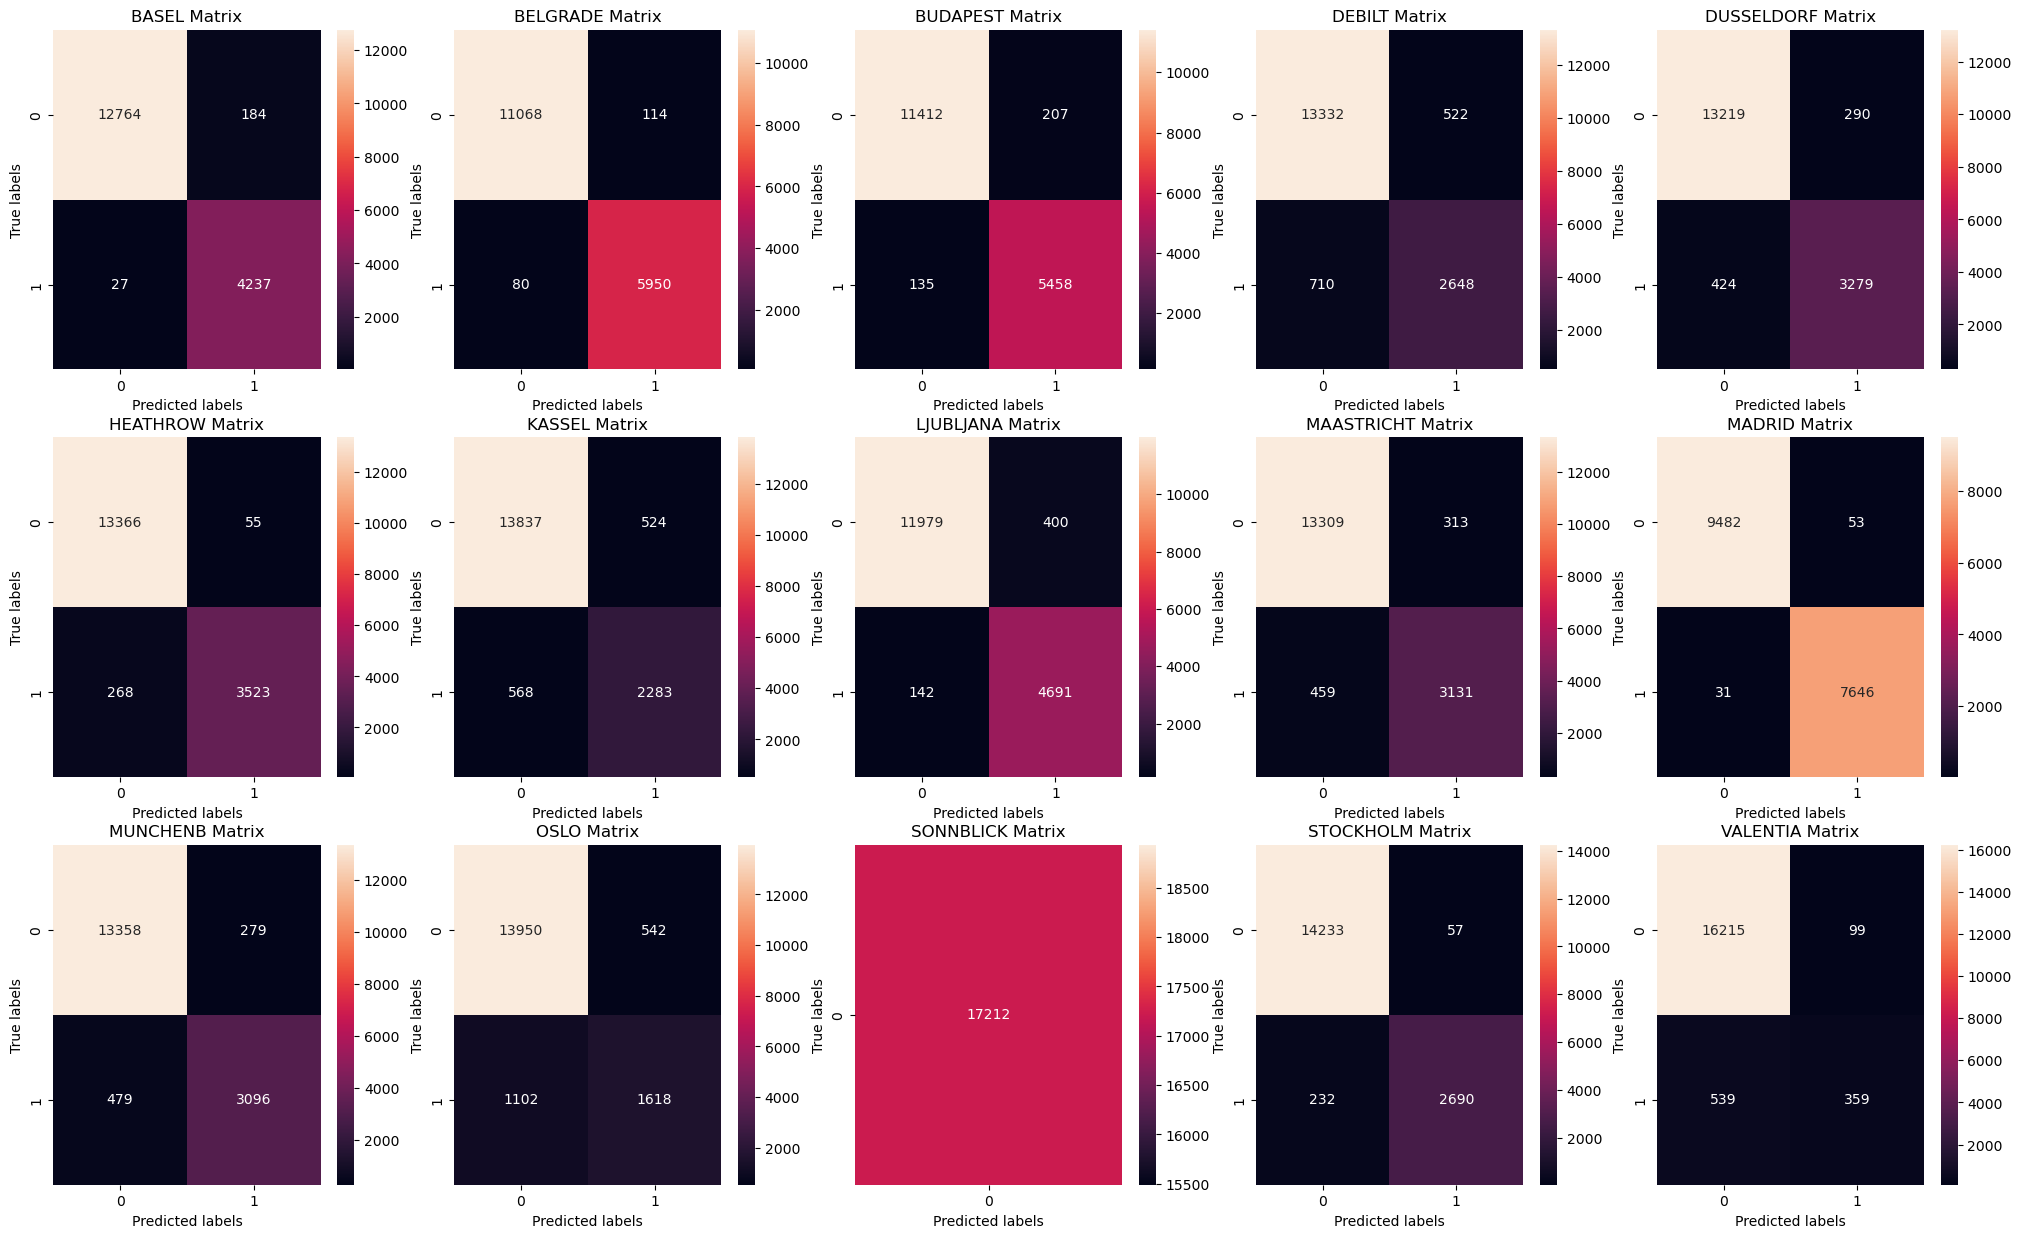

In [86]:
# Multi-station confusion matrix on the training data
locations = list({x.split("_")[0] for x in X.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix');
        count+=1

C:\Users\thoma\Documents\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


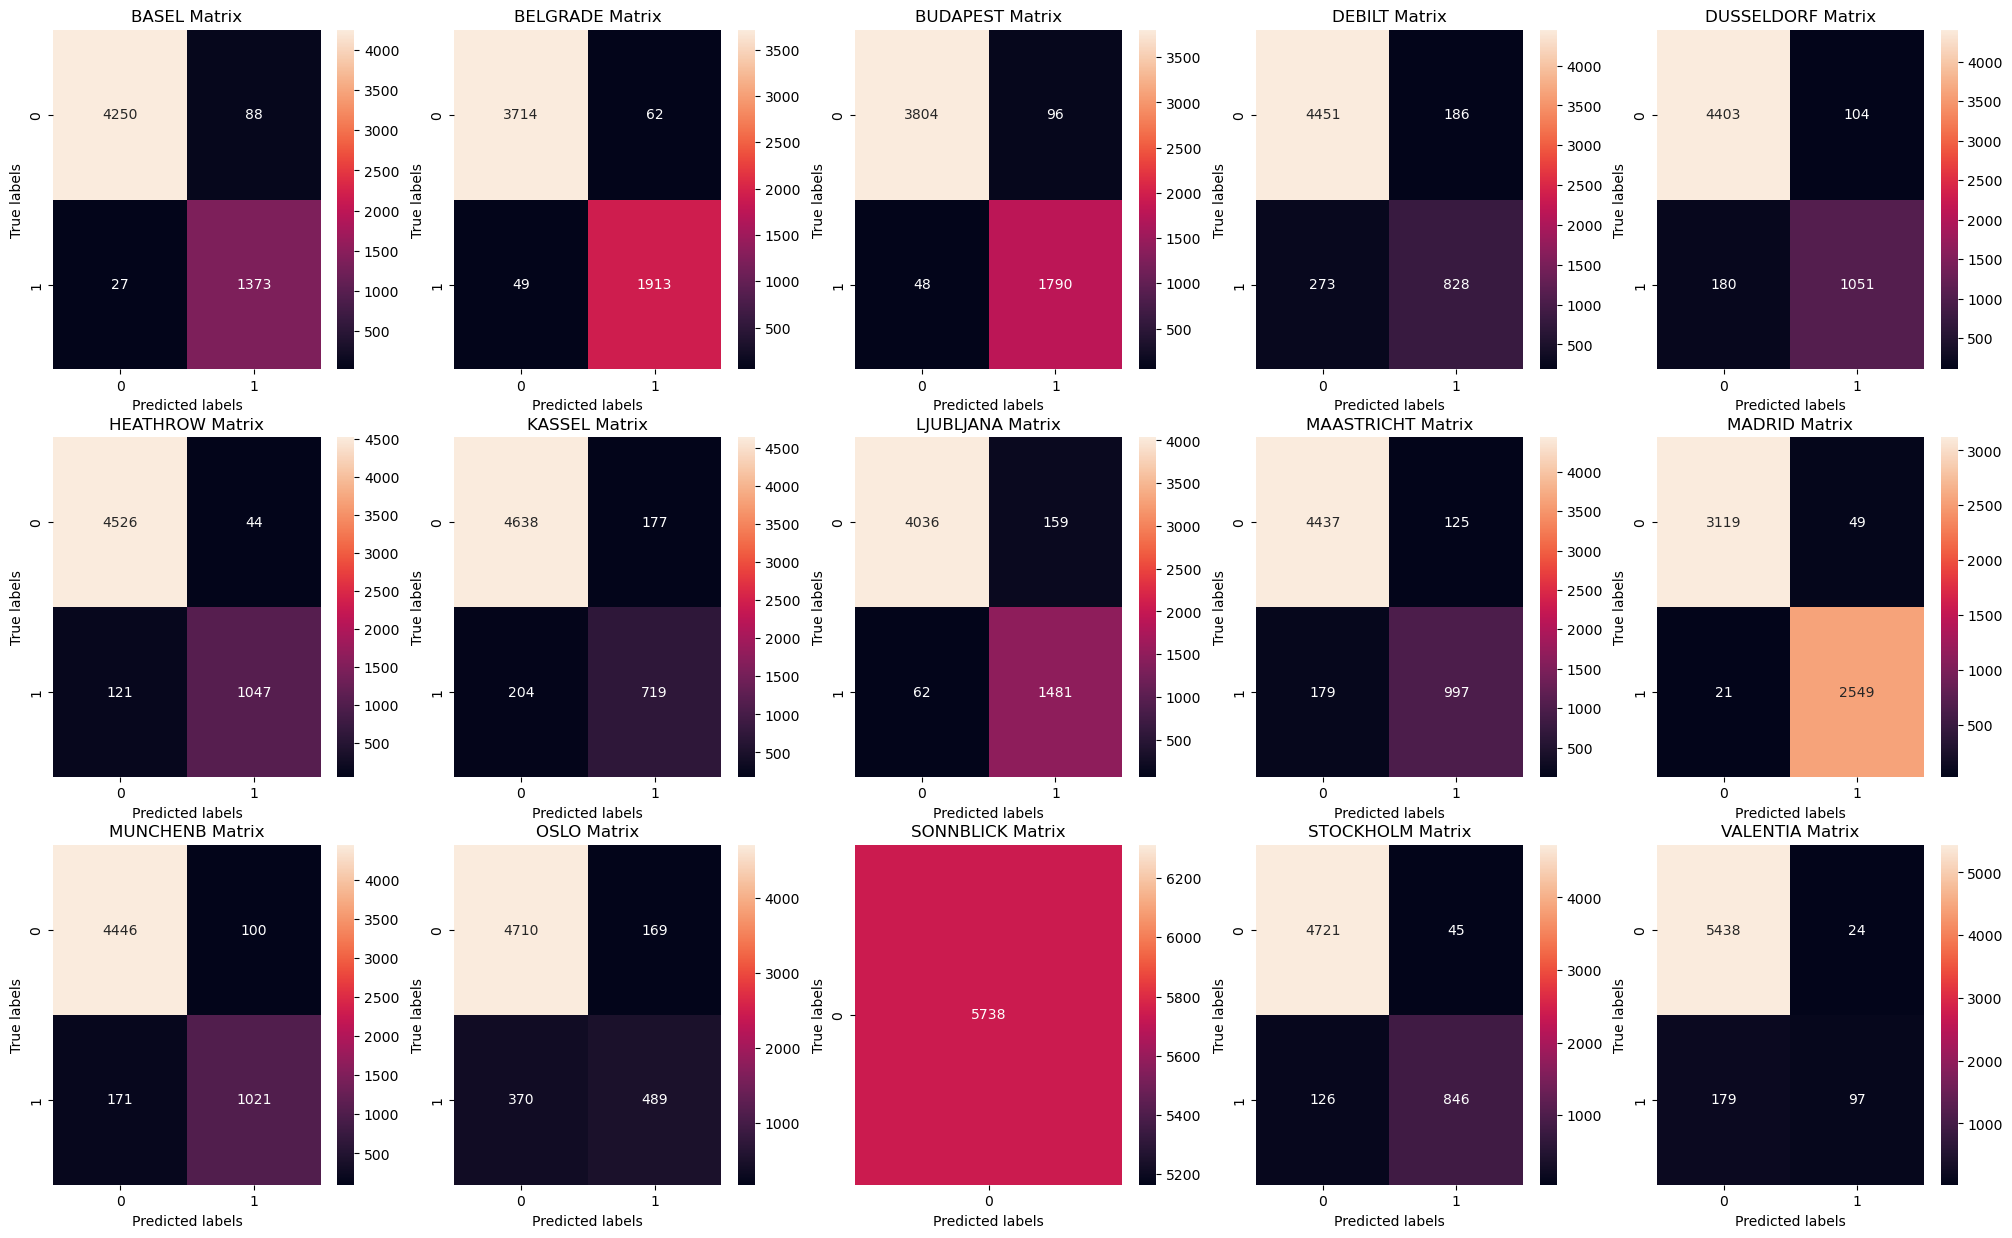

In [87]:
# Multi-station confusion matrix on the testing data
locations = list({x.split("_")[0] for x in X.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix');
        count+=1

# Finally getting somewhere, but the model still needs adjustment.

In [88]:
# Further adjusting model parameters
# So (50, 25, 25) is three hidden layers with 50, 25 and 25 nodes respectively.
mlp = MLPClassifier(hidden_layer_sizes=(50, 25, 25), max_iter=1000, tol=0.0001)

# Fitting the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 25, 25), max_iter=1000)

In [89]:
# Accuracy score
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.7778875203346503
0.6631230393865458


C:\Users\thoma\Documents\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


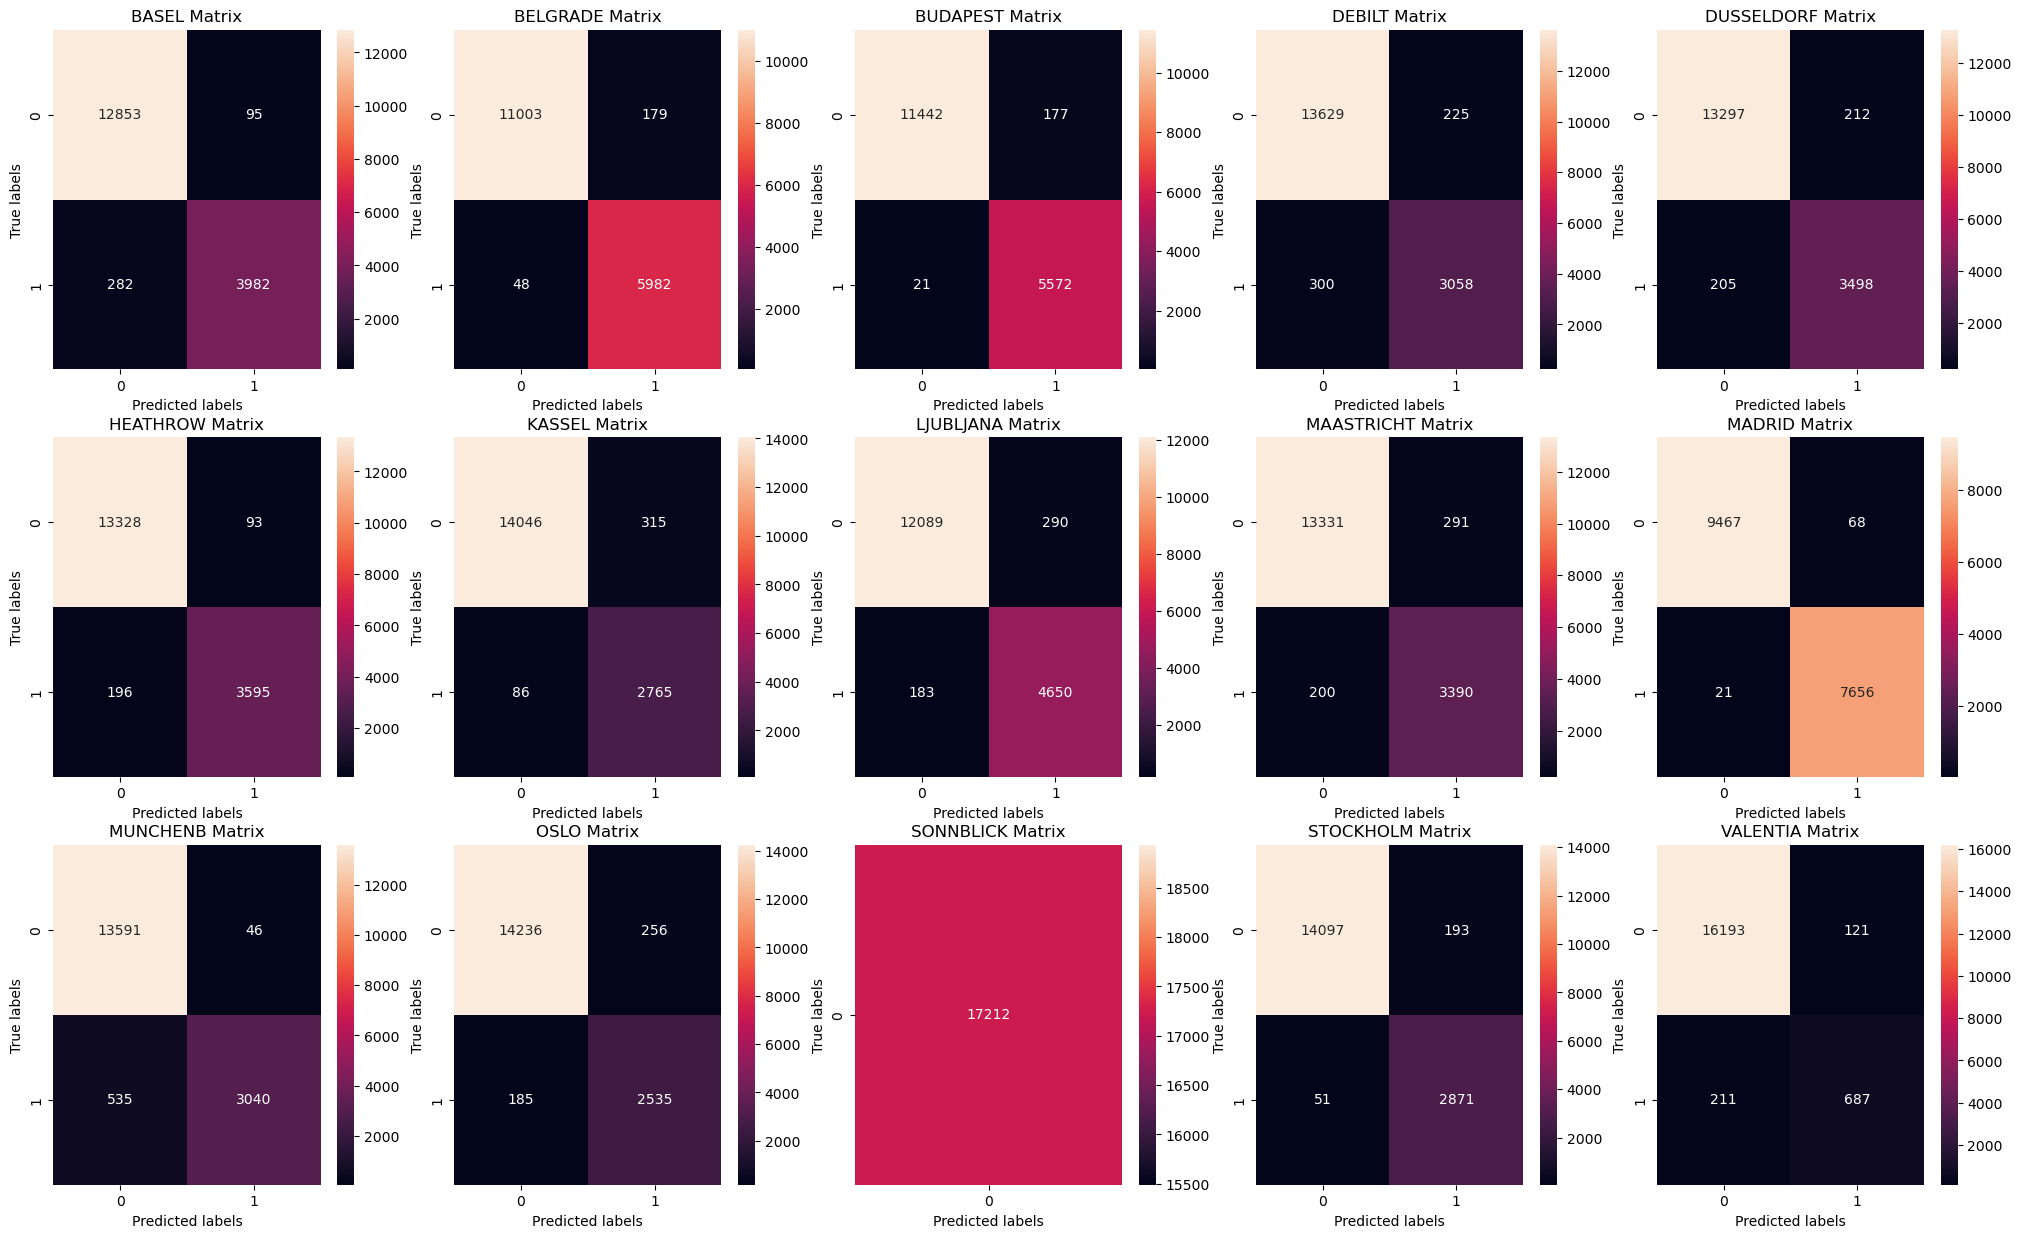

In [90]:
# Multi-station confusion matrix on the training data
locations = list({x.split("_")[0] for x in X.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred[:,count])
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix');
        count+=1

C:\Users\thoma\Documents\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


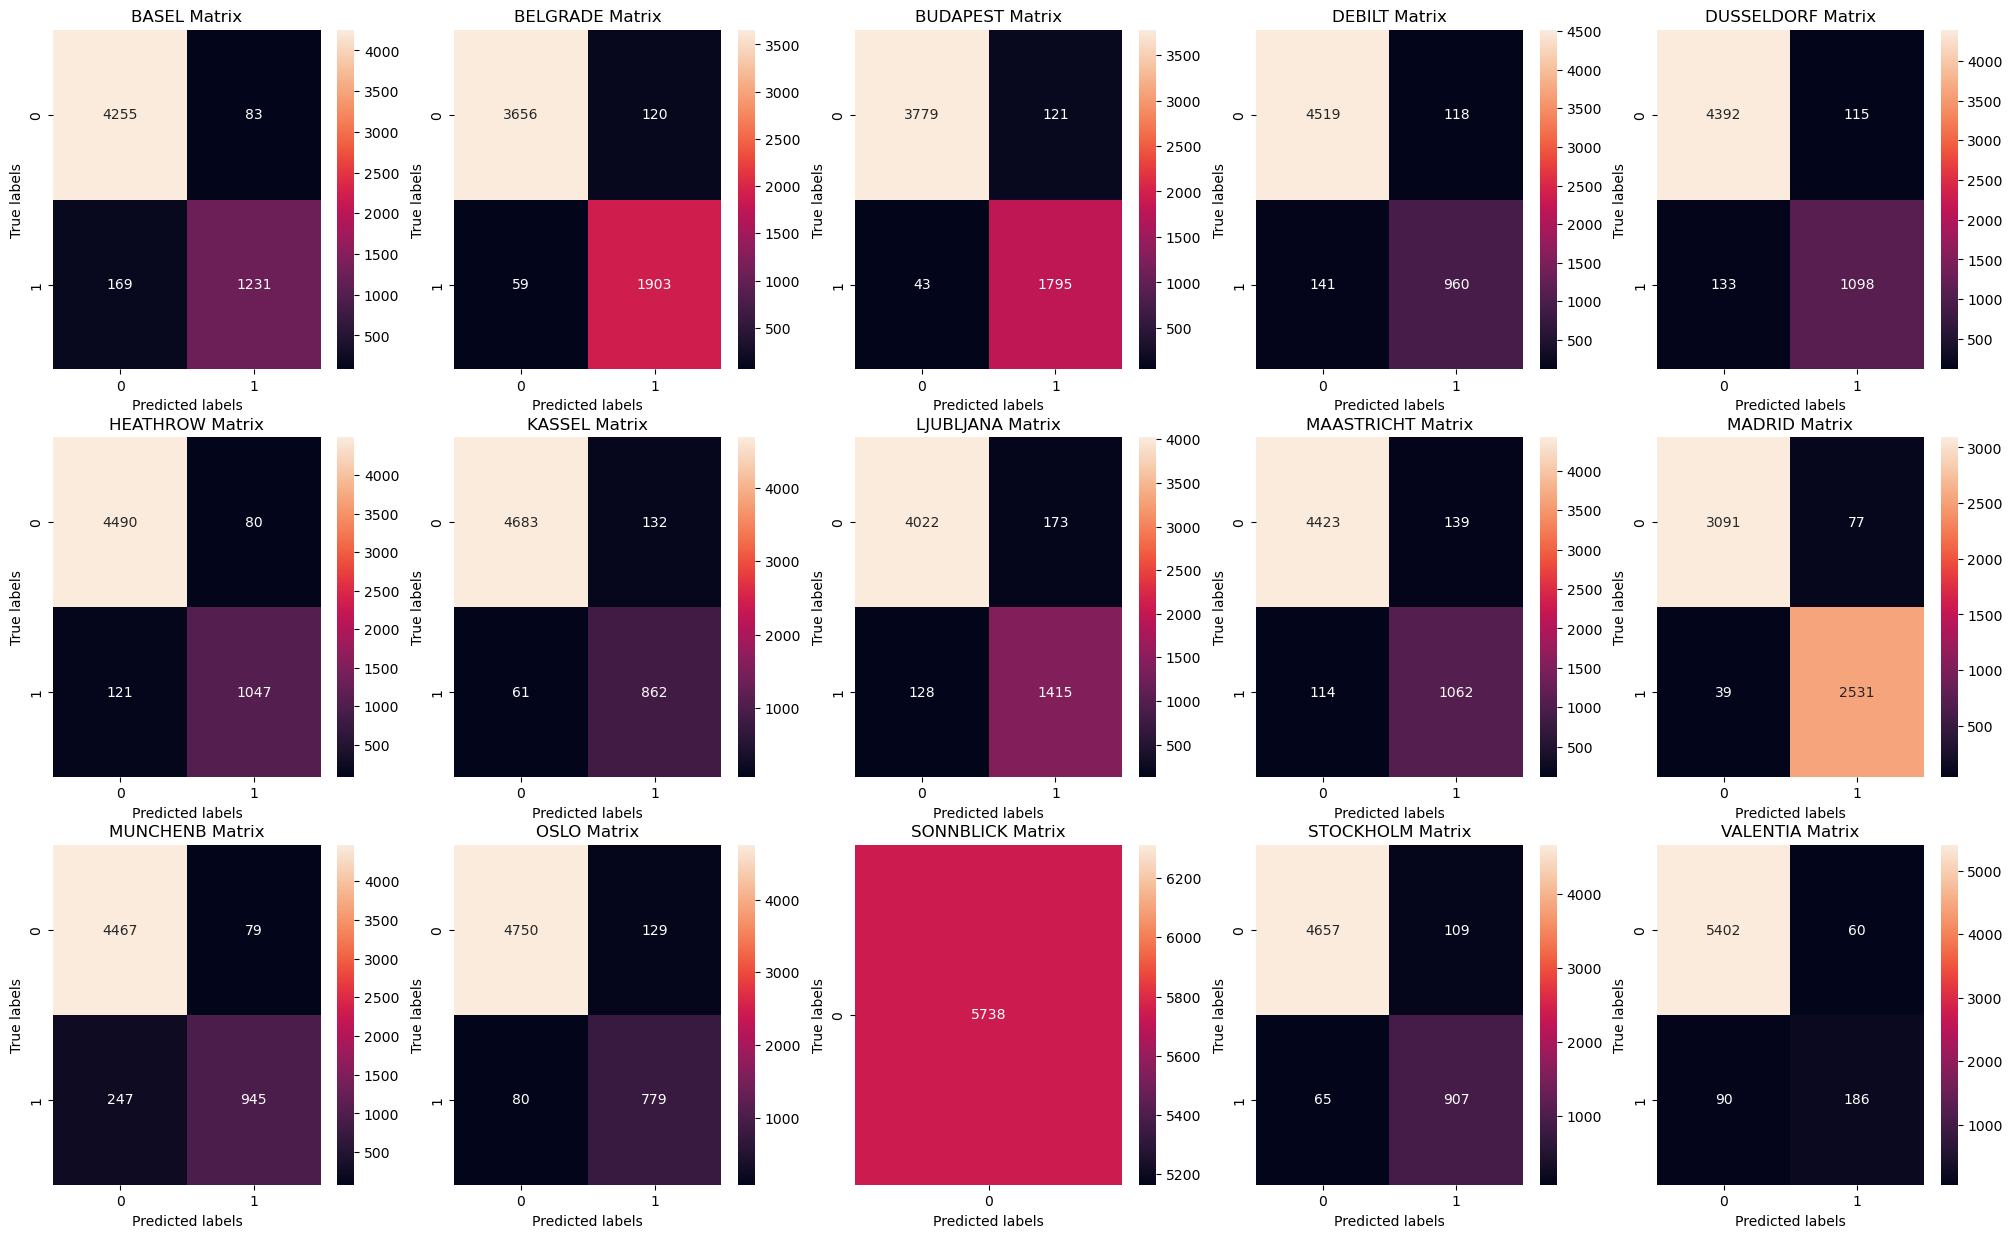

In [91]:
# Multi-station confusion matrix on the testing data
locations = list({x.split("_")[0] for x in X.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix');
        count+=1

# Getting better, but the model still seems to need adjustment.

In [99]:
# Further adjusting model parameters
# So (70, 50, 50) is three hidden layers with 70, 50 and 50 nodes respectively.
mlp = MLPClassifier(hidden_layer_sizes=(70, 40, 40), max_iter=1000, tol=0.0001)

# Fitting the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(70, 40, 40), max_iter=1000)

In [100]:
# Accuracy score
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.8093771787125261
0.6052631578947368


# -> the accuracy score on the testing data starts dropping.